## Assigment on basic blog generator

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="gemma2-9b-it")

In [3]:
from langgraph.graph import MessagesState

In [4]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [40]:
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a Title Creator. Create ONE short, catchy title for the given topic. Just return the title, nothing else.")


def title_creator(state:MessagesState):
    return {"messages":[llm.invoke([sys_msg] + state["messages"])]}

In [41]:
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a Content Creator. Write a detailed explanation for the given title.")


def content_creator(state:MessagesState):
    return {"messages":[llm.invoke([sys_msg] + state["messages"])]}

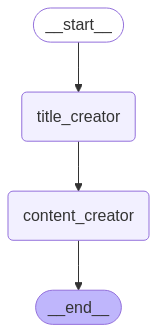

In [42]:
from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display


builder=StateGraph(MessagesState)

# ## Define the node
# builder.add_node("title_creator", title_creator)
# builder.add_node("content_creator", content_creator)

# builder.add_edge(START, "title_creator")
# builder.add_edge("title_creator", content_creator)
# builder.add_edge("content_creator", END)

# graph = builder.compile()

# Add nodes
builder.add_node("title_creator", title_creator)
builder.add_node("content_creator", content_creator)

# Add edges
builder.add_edge(START, "title_creator")
builder.add_edge("title_creator", "content_creator")
builder.add_edge("content_creator", END)

# Compile the graph
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [43]:
messages = [HumanMessage(content="Machine Learning")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Machine Learning
================================== Ai Message ==================================

## Demystifying Machine Learning: Your Guide to the Intelligent Revolution

Machine learning (ML) is a branch of artificial intelligence (AI) that empowers computers to learn from data without explicit programming. Imagine teaching a dog a new trick – instead of giving it step-by-step instructions, you show it examples, reward desired behaviors, and it gradually learns the pattern. Machine learning operates on a similar principle, using algorithms to analyze vast amounts of data and identify patterns, make predictions, and improve its performance over time.

**How does it work?**

At its core, machine learning relies on algorithms – sets of instructions that computers follow to process data. These algorithms are trained on massive datasets, enabling them to identify relationships, trends, and anomalies withi